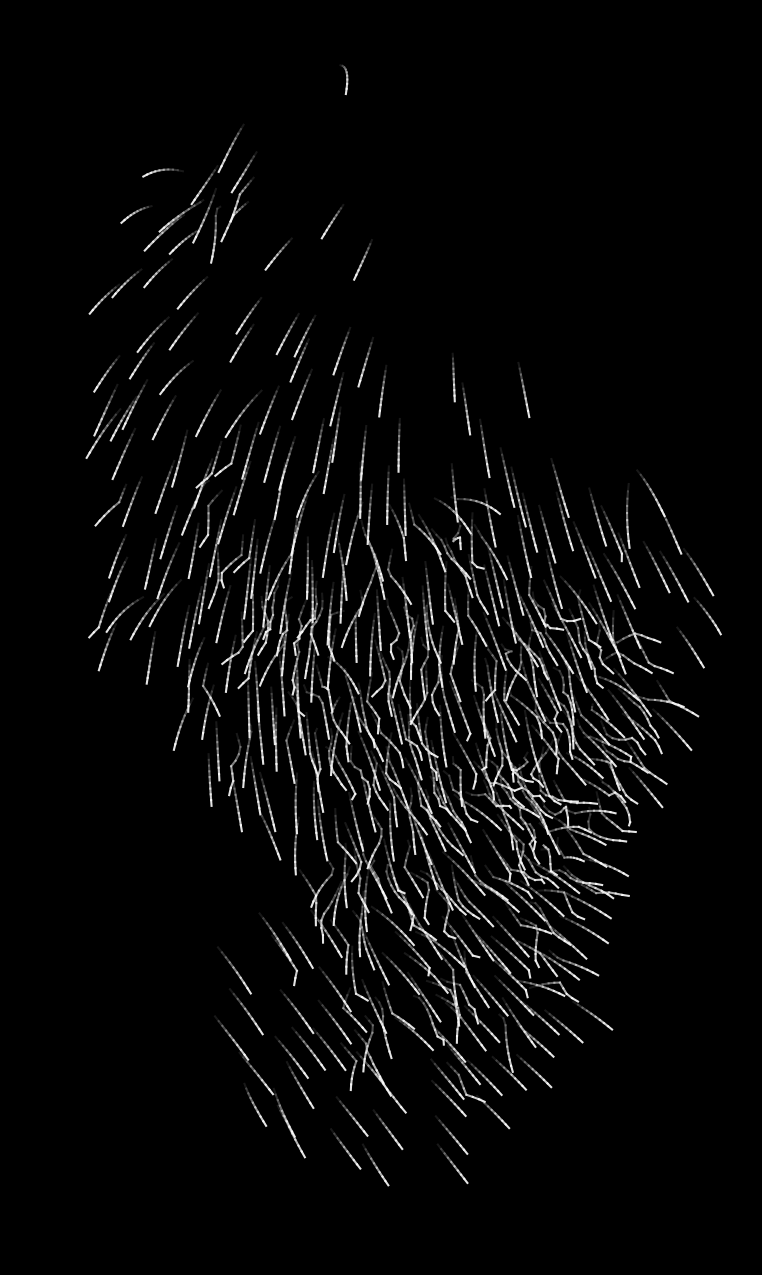

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# class Boid:
#     def __init__(self, x, y, vx, vy):
#         self.x = x
#         self.y = y
#         self.vx = vx
#         self.vy = vy

# class Flock:
#     def __init__(self, num_boids, width, height):
#         self.boids = []
#         self.width = width
#         self.height = height
#         for _ in range(num_boids):
#             x = np.random.rand() * width
#             y = np.random.rand() * height
#             vx = (np.random.rand() - 0.5) * 10
#             vy = (np.random.rand() - 0.5) * 10
#             self.boids.append(Boid(x, y, vx, vy))

#     # def update(self, visual_range=200, protected_range=20, max_speed=9, min_speed=3,
#     #         centering_factor=0.0009, avoid_factor=0.3, matching_factor=0.09, margin=55,
#     #         edge_avoid_factor=0.4):

#     def update(self, visual_range=200, protected_range=20, max_speed=9, min_speed=3,
#                centering_factor=0.0009, avoid_factor=0.4, matching_factor=0.09, margin=55,
#                edge_avoid_factor=0.4, turn_smoothness=10):
#         for boid in self.boids:
#             close_dx, close_dy = 0, 0
#             xvel_avg, yvel_avg = 0, 0
#             xpos_avg, ypos_avg = 0, 0
#             neighboring_boids = 0

#             for other_boid in self.boids:
#                 if other_boid is boid:
#                     continue

#                 dx, dy = boid.x - other_boid.x, boid.y - other_boid.y
#                 distance_squared = dx**2 + dy**2

#                 if distance_squared < protected_range**2:
#                     close_dx += dx
#                     close_dy += dy
#                 elif distance_squared < visual_range**2:
#                     xpos_avg += other_boid.x
#                     ypos_avg += other_boid.y
#                     xvel_avg += other_boid.vx
#                     yvel_avg += other_boid.vy
#                     neighboring_boids += 1

#             if neighboring_boids > 0:
#                 xpos_avg /= neighboring_boids
#                 ypos_avg /= neighboring_boids
#                 xvel_avg /= neighboring_boids
#                 yvel_avg /= neighboring_boids

#                 boid.vx += ((xpos_avg - boid.x) * centering_factor +
#                             (xvel_avg - boid.vx) * matching_factor)
#                 boid.vy += ((ypos_avg - boid.y) * centering_factor +
#                             (yvel_avg - boid.vy) * matching_factor)

#             boid.vx += close_dx * avoid_factor
#             boid.vy += close_dy * avoid_factor

#             # Smooth edge turning
#             if boid.x < margin:
#                 boid.vx += edge_avoid_factor * (1 - np.exp(-(margin - boid.x) / turn_smoothness))
#             elif boid.x > self.width - margin:
#                 boid.vx -= edge_avoid_factor * (1 - np.exp(-(boid.x - (self.width - margin)) / turn_smoothness))

#             if boid.y < margin:
#                 boid.vy += edge_avoid_factor * (1 - np.exp(-(margin - boid.y) / turn_smoothness))
#             elif boid.y > self.height - margin:
#                 boid.vy -= edge_avoid_factor * (1 - np.exp(-(boid.y - (self.height - margin)) / turn_smoothness))

#             # Calculate speed and enforce speed limits
#             speed = np.sqrt(boid.vx**2 + boid.vy**2)
#             if speed < min_speed:
#                 boid.vx = (boid.vx / speed) * min_speed
#                 boid.vy = (boid.vy / speed) * min_speed
#             elif speed > max_speed:
#                 boid.vx = (boid.vx / speed) * max_speed
#                 boid.vy = (boid.vy / speed) * max_speed

#             # Update position with velocity
#             boid.x += boid.vx
#             boid.y += boid.vy


#     def get_positions(self):
#         return [(boid.x, boid.y) for boid in self.boids]

# # def animate(flock, num_frames, width, height):
# #     plt.figure(facecolor='black')
# #     fig, ax = plt.subplots()
# #     ax.set_xlim(0, width)
# #     ax.set_ylim(0, height)
# #     ax.set_facecolor('black')
# #     points, = ax.plot([], [], 'wo', markersize=1)  # Small white dots

# #     def init():
# #         points.set_data([], [])
# #         return points,

# #     def update(frame):
# #         flock.update()
# #         x, y = zip(*flock.get_positions())
# #         points.set_data(x, y)
# #         return points,

# #     return FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)

# def animate(flock, num_frames, width, height, trail_length=10):
#     plt.figure(facecolor='black')
#     fig, ax = plt.subplots()
#     ax.set_xlim(0, width)
#     ax.set_ylim(0, height)
#     ax.set_facecolor('black')
    
#     # Initialize the trails
#     trails = {i: [] for i in range(len(flock.boids))}

#     def init():
#         return []

#     def update(frame):
#         flock.update()
#         new_positions = flock.get_positions()
        
#         # Update the trails
#         for i, pos in enumerate(new_positions):
#             trails[i].append(pos)  # Add new position to trail
#             trails[i] = trails[i][-trail_length:]  # Keep the trail length limited

#         ax.clear()
#         ax.set_facecolor('black')
#         for trail in trails.values():
#             if len(trail) > 1:
#                 # Plot each trail segment with decreasing alpha
#                 for j in range(len(trail) - 1):
#                     alpha = 1.0 - (len(trail) - 1 - j) / len(trail)
#                     ax.plot([trail[j][0], trail[j+1][0]], [trail[j][1], trail[j+1][1]], 'w-', alpha=alpha)

#         return ax.get_children()  # Return all the plot elements

#     return FuncAnimation(fig, update, frames=num_frames, init_func=init)



# # Parameters
# num_boids = 500
# width = 1920
# height = 1080
# num_frames = 800  # Longer animation to observe behavior

# # Initialize flock and animation
# flock = Flock(num_boids, width, height)
# anim = animate(flock, num_frames, width, height)

# # Save the animation
# anim.save('Boids_algorithm.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Boid:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

class Flock:
    def __init__(self, num_boids, width, height):
        self.boids = []
        self.width = width
        self.height = height
        for _ in range(num_boids):
            x = np.random.rand() * width
            y = np.random.rand() * height
            vx = (np.random.rand() - 0.5) * 10
            vy = (np.random.rand() - 0.5) * 10
            self.boids.append(Boid(x, y, vx, vy))

    def update(self, visual_range=200, protected_range=20, max_speed=9, min_speed=3,
               centering_factor=0.0009, avoid_factor=0.4, matching_factor=0.09, margin=55,
               edge_avoid_factor=0.4, turn_smoothness=10):
        for boid in self.boids:
            close_dx, close_dy = 0, 0
            xvel_avg, yvel_avg = 0, 0
            xpos_avg, ypos_avg = 0, 0
            neighboring_boids = 0

            for other_boid in self.boids:
                if other_boid is boid:
                    continue

                dx, dy = boid.x - other_boid.x, boid.y - other_boid.y
                distance_squared = dx**2 + dy**2

                if distance_squared < protected_range**2:
                    close_dx += dx
                    close_dy += dy
                elif distance_squared < visual_range**2:
                    xpos_avg += other_boid.x
                    ypos_avg += other_boid.y
                    xvel_avg += other_boid.vx
                    yvel_avg += other_boid.vy
                    neighboring_boids += 1

            if neighboring_boids > 0:
                xpos_avg /= neighboring_boids
                ypos_avg /= neighboring_boids
                xvel_avg /= neighboring_boids
                yvel_avg /= neighboring_boids

                boid.vx += ((xpos_avg - boid.x) * centering_factor +
                            (xvel_avg - boid.vx) * matching_factor)
                boid.vy += ((ypos_avg - boid.y) * centering_factor +
                            (yvel_avg - boid.vy) * matching_factor)

            boid.vx += close_dx * avoid_factor
            boid.vy += close_dy * avoid_factor

            # Smooth edge turning
            if boid.x < margin:
                boid.vx += edge_avoid_factor * (1 - np.exp(-(margin - boid.x) / turn_smoothness))
            elif boid.x > self.width - margin:
                boid.vx -= edge_avoid_factor * (1 - np.exp(-(boid.x - (self.width - margin)) / turn_smoothness))

            if boid.y < margin:
                boid.vy += edge_avoid_factor * (1 - np.exp(-(margin - boid.y) / turn_smoothness))
            elif boid.y > self.height - margin:
                boid.vy -= edge_avoid_factor * (1 - np.exp(-(boid.y - (self.height - margin)) / turn_smoothness))

            # Calculate speed and enforce speed limits
            speed = np.sqrt(boid.vx**2 + boid.vy**2)
            if speed < min_speed:
                boid.vx = (boid.vx / speed) * min_speed
                boid.vy = (boid.vy / speed) * min_speed
            elif speed > max_speed:
                boid.vx = (boid.vx / speed) * max_speed
                boid.vy = (boid.vy / speed) * max_speed

            # Update position with velocity
            boid.x += boid.vx
            boid.y += boid.vy

    def get_positions(self):
        return [(boid.x, boid.y) for boid in self.boids]

def animate(flock, num_frames, width, height, trail_length=10):
    fig, ax = plt.subplots(figsize=(9, 16))  # Adjusting the figure size to 9:16 aspect ratio
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')  # Set the figure background to black

    trails = {i: [] for i in range(len(flock.boids))}

    def init():
        return []

    def update(frame):
        flock.update()
        new_positions = flock.get_positions()

        trails_data = []
        for i, pos in enumerate(new_positions):
            trails[i].append(pos)
            trails[i] = trails[i][-trail_length:]
            if len(trails[i]) > 1:
                trails_data.extend(trails[i])

        ax.clear()
        ax.set_facecolor('black')
        # for trail in trails.values():
        #     if len(trail) > 1:
        #         xs, ys = zip(*trail)
        #         ax.plot(xs, ys, 'w-', alpha=0.5)
        for trail in trails.values():
            if len(trail) > 1:
                # Plot each trail segment with decreasing alpha
                for j in range(len(trail) - 1):
                    alpha = 1.0 - (len(trail) - 1 - j) / len(trail)
                    ax.plot([trail[j][0], trail[j+1][0]], [trail[j][1], trail[j+1][1]], 'w-', alpha=alpha)

        return ax.get_children()

    return FuncAnimation(fig, update, frames=num_frames, init_func=init)

# Parameters
num_boids = 500
width = 1080  # Adjusted to typical Instagram reel width
height = 1920  # Adjusted to typical Instagram reel height
num_frames = 800  # Longer animation to observe behavior

# Initialize flock and animation
flock = Flock(num_boids, width, height)
anim = animate(flock, num_frames, width, height)

# Save the animation
anim.save('Boids_algorithm_reel.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
